In [ ]:
import os
import sys

module_path = os.path.abspath(os.path.join('../../src'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

In [1]:
import csv 
from pathlib import Path
from os import listdir
import pickle

from labeling_utils import load_labels

import numpy as np
from sklearn.metrics import precision_recall_fscore_support


# tags=["Songbird","Water Bird","Insect","Running Water","Rain","Cable","Wind","Vehicle","Aircraft"]
tags=["Songbird","Water Bird","Insect","Running Water","Rain","Cable","Wind","Aircraft"]

from tabulate import tabulate
tag_set=tags[:]


* Count only highest ranking tag (what if both of them exist)
* Bird tag is confusing, it can be also waterbird, how to handle ? Also Animal
* 

In [2]:
#LOAD MODEL predictions
splits_path= Path('/files/scratch/enis/data/nna/labeling/splits/')

labelsbymodelpath=Path('/scratch/enis/data/nna/labeling/deep_labels/')
dbfile = open(labelsbymodelpath / "classifications_all_2.pkl", 'rb')  
modelresults = pickle.load(dbfile) 
dbfile.close() 

In [3]:
# print(len(modelresults))
# aiter=iter(modelresults.keys())
# akey=next(aiter)
# print(akey)
# modelresults[akey]

In [4]:
import csv
from os import listdir
from pathlib import Path

# LOAD LABELS by human
labelsbyhumanpath=Path('/scratch/enis/data/nna/labeling/results/')
# filter csv extension also by username
labelsbyhuman=[i for i in listdir(labelsbyhumanpath) if (".csv" in i ) ]

humanresults={}
counter=0
for apath in labelsbyhuman:
    with open(labelsbyhumanpath / apath, newline='') as f:
        reader=csv.reader(f)
        for row in reader:
            counter+=1
            humanresults[row[0]]=row[1:]

print("unique files:",len(humanresults),"\ntotal files",counter)

unique files: 1300 
total files 1366


In [5]:
# humanresults


In [6]:
#Join vehicle and Aircraft
for file_name,tagshere in humanresults.items():
#     print(file_name,tagshere)
    
    tagshere=["Aircraft" if tag == "Vehicle" else tag for tag in tags]

In [7]:

#     humanresults[file_name]=thetag

In [8]:
histogram={}
for file_name in humanresults:
    place_name=file_name.split("_")[0]
#     print(file_name)
    histogram.setdefault(place_name,0)
    histogram[place_name]+=1

In [9]:
a=list(histogram.items())
a.sort(key=lambda x:x[1],reverse=True)
# a

In [10]:
# load name of the labels
labels=load_labels()

In [11]:
items={}
from IPython.display import Audio,display,HTML
from ipywidgets import Output

items["mp3_output"]=Output()

def play_html_modify(mp3file,items={}):
#     out=items["mp3_output"]
#     displayed=display(HTML("<audio controls  loop autoplay><source src={} type='audio/mpeg'></audio>".format(mp3file)))
    displayed=display(HTML("<audio controls  loop><source src={} type='audio/mpeg'></audio>".format(mp3file)))


In [12]:
# # insect_dict={}
# # bird_dict={}
# # water_bird_dict={}
# tag_label_hist_dict={}
# for file in humanresults:
#     print("\n\n",humanresults[file],file)
#     orig,audioop = modelresults[file]
#     for tag in humanresults[file]:
#         tag_label_hist_dict.setdefault(tag,{})
#         for i in range(len(orig[0])):
#             label=labels[orig[0][i]]
#             tag_label_hist_dict[tag].setdefault(label,0)
#             tag_label_hist_dict[tag][label]+=1
#     for i in range(len(orig[0])):
#         label=labels[orig[0][i]]
#         print(labels[orig[0][i]], "{0:.2}".format(orig[1][i])) 
#     play_html_modify(splits_path/file)


In [13]:
# {'UMIRUK_20160619_065245_0035m_01s__0035m_11s.mp3':[("FP","Bird",0.24)],
#  'CLVL2_20160705_051422_2803m_52s__2804m_02s.mp3':[("FP","Quack",0.19)],
#  'USGS_20160603_151612_2260m_16s__2260m_26s.mp3':[("FP","Vehicle",0.36),("TP","Wind",0.26)],
#   "FSHCK1_20160812_083207_2508m_40s__2508m_50s.mp3":[("FP","Bird",0.039)],
#  "ITKILLIK1_20160806_221708_1193m_10s__1193m_20s.mp3":[("FP","Duck",0.12)],
#  "CD3_20160728_185506_2303m_25s__2303m_35s.mp3":[("FP","Vehicle", 0.41)],
#   "OCNPT_20160703_025043_0016m_42s__0016m_52s.mp3":[("FP","Duck",0.2)],

# }

In [14]:
# tag="Running Water"
# sorted_result=sorted(list(tag_label_hist_dict[tag].items()),key = lambda x: x[1],reverse=True)

# table=[]
# headers=["Label","Count","Is_included in {}".format(tag)]
# for i in sorted_result:
#     if i[0] in tag2labelmappings[tag]:
#         table.append([i[0][0:10],i[1],"yes"])
#     else:
#         table.append([i[0][0:10],i[1],"no"])
    
# print(tabulate(table, headers=headers))  
# # Fowl

In [15]:
# insect_list=list(insect_dict.items())
# insect_list.sort(reverse=True,key = lambda x: x[1])
# insect_list

In [87]:
# for i in labels:
#     if i in ["Howl wind"]:
#         print(i)
#     if "Howl" in i:
#         print(i)

In [200]:
t=0
for val in tag2labelmappings.values():
    t+=len(val)
print(t)

65


In [199]:
tag2labelmappings={
    "Songbird": ['Bird','Owl','Bird vocalization, bird call, bird song',
                     'Pigeon, dove','Coo','Chirp, tweet','Squawk',
                     'Bird flight, flapping wings','Gull, seagull','Chirp tone',
                     'Hoot'],
    "Water Bird":['Duck','Goose','Quack','Frog',"Croak",'Caw'],
    "Insect":   ['Fly, housefly','Insect', 'Bee, wasp, etc.', 'Buzz','Mosquito',"Cricket","Rustle"],
    "Vehicle":  ['Vehicle','Car', 'Engine','Boat, Water vehicle','Train','Rail transport',
                    'Motor vehicle (road)','Railroad car, train wagon',
                    'Motorboat, speedboat', 'Motorcycle','Subway, metro, underground', 
                     'Lawn mower','Electric shaver, electric razor',
                    'Jet engine', 'Light engine (high frequency)','Sewing machine','Power tool'],
    "Aircraft":  ['Engine','Fixed-wing aircraft, airplane','Aircraft engine',
                'Propeller, airscrew','Aircraft', 'Helicopter'],
    "Running Water":["Waterfall","Waves, surf"],
    "Rain":["Rain","Raindrop","Rain on surface",],
    "Cable":["Bang","Slap, smack","Whack, thwack",
             "Smash, crash","Breaking","Knock","Tap",
             "Thump, thud","Whip","Flap","Clip-clop"],
    "Wind":["Wind","Howl"]}

#Dara's tags
# Vehicle: 36845
# Boat; Water vehicle: 6364
# Aircraft: 1457
# Fixed-wing aircraft; airplane: 868
# Car: 134
# Motorboat; speedboat: 126
# Train: 60
# Rail transport: 38
# Railroad car; train wagon: 21
# Engine: 19
# Subway; metro; underground: 4
# Propeller; airscrew: 2
# Motorcycle: 1
# Helicopter: 1
# Aircraft engine:
    
#??'Fowl','Turkey',"Gobble",
#"Chicken, rooster", "Cluck", "Crowing, cock-a-doodle-doo"
#? 'Animal'
# 'Bird flight, flapping wings'

# ? 'Heart sounds, heartbeat'
# 'Honk', 
# 'Static'
label2tagmappings={}

for tag in tag2labelmappings:
    for label in tag2labelmappings[tag]:
        label2tagmappings.setdefault(label,[])
        label2tagmappings[label].append(tag)

# assigned_labels [[indexes],[probabilities]]
def maplabels2tags(assigned_labels,label2tagmappings,prob_threshold=0.001):
    predictions=set()
    for label,prob in zip(*assigned_labels):
        label=labels[label]
        if prob>prob_threshold:
            tags=label2tagmappings.get(label,[])
            predictions.update(set(tags))
    return predictions

In [89]:
" (86, 'Livestock, farm animals, working animals'),"
# list(enumerate(labels))


" (86, 'Livestock, farm animals, working animals'),"

In [90]:
# assigned_labels [[indexes],[probabilities]] 
# returns predictions: {"tag1","tag2"}
def predict(assigned_labels,label2tagmappings,prob_threshold=0.001):
    predictions=set()
    for label,prob in zip(*assigned_labels):
        label=labels[label]
#         print(prob)
#         print(prob_threshold)
        if prob>prob_threshold:
            tags=label2tagmappings.get(label,[])
#             print(tags)
            predictions.update(set(tags))
    return predictions

# assigned_labels [[indexes],[probabilities]] 
# returns predictions: {("tag1",confidence),("tag2",confidence)}
# if  
def predict_wconfidence(assigned_labels,label2tagmappings,prob_threshold=0.001):
    tag_prob={}
    for label,prob in zip(*assigned_labels):
        label=labels[label]
#         print(prob)
#         print(prob_threshold)
        if prob>prob_threshold:                
            tags=label2tagmappings.get(label,[])
            for tag in tags:
                tag_prob.setdefault(tag,0)
                if prob>tag_prob[tag]:
                    tag_prob[tag]=prob
#             print(tags)

    return tag_prob



In [91]:
predict_wconfidence([[105,104],[0.3,0.2]],label2tagmappings,0.001)

{'Water Bird': 0.3}

In [92]:
# returns a dictionary, keys are tags from tag set and values are binary list 
# 
def vectorized_y_true(humanresults,tag_set):
    y_true={tag: [None]*len(humanresults) for tag in tag_set}
    for i,tags in enumerate(humanresults.values()):
        # we  only look for tags in tag_set
        for tag in tag_set:
            if tag in tags:
                y_true[tag][i] = 1
            else:
                y_true[tag][i] = 0 
    return y_true

def vectorized_y_pred(humanresults,tag_set,label2tagmappings,prob_threshold=0.01):
    y_pred={tag: [None]*len(humanresults) for tag in tag_set}
    for i,filename in enumerate(humanresults.keys()):
        orig,audioop = modelresults[filename]
        orig_predictions=predict(orig,label2tagmappings,prob_threshold=prob_threshold)
        for tag in tag_set:
            if tag in orig_predictions:
                y_pred[tag][i] = 1
            else:
                y_pred[tag][i] = 0   
    return y_pred

def vectorized_y_pred_prob(humanresults,tag_set,label2tagmappings,prob_threshold=0.01):
    y_pred={tag: [None]*len(humanresults) for tag in tag_set}
    for i,filename in enumerate(humanresults.keys()):
        orig,audioop = modelresults[filename]
        orig_predictions=predict_wconfidence(orig,label2tagmappings,prob_threshold=prob_threshold)
        for tag in tag_set:
            prob=orig_predictions.get(tag,0)
            y_pred[tag][i]=prob
  
    return y_pred

# for a given audioset label, return y_pred (probabilites) for each tag
# since probability does not change for each tag, all lists are identical in y_pred
def vectorized_y_pred_prob_pertag(label_index,humanresults,tag_set,label2tagmappings,prob_threshold=0.01):
    y_pred={tag: [0]*len(humanresults) for tag in tag_set}
    for i,filename in enumerate(humanresults.keys()):
        orig,audioop = modelresults[filename]
        orig_index = orig[0].index(label_index) if label_index in orig[0] else None
        if orig_index:
            prob = orig[1][orig_index]
            for tag in tag_set:
                y_pred[tag][i]=prob
    for y in y_pred:
        y_pred[y]=np.array(y_pred[y])
  
    return y_pred

#since vectorized_y_pred_prob_pertag returns a dict with identical lists
# this one returns single list
def vectorized_y_pred_prob_generaltag(label_index,humanresults,modelresults):
#     y_pred={tag: [0]*len(humanresults) for tag in tag_set}
    y_pred=[0]*len(humanresults)
    for i,filename in enumerate(humanresults.keys()):
        orig,audioop = modelresults[filename]
        orig_index = orig[0].index(label_index) if label_index in orig[0] else None
        if orig_index:
            prob = orig[1][orig_index]
            y_pred[i]=prob

    return y_pred

In [93]:
#         orig=([labels[i] for i in orig[0]],orig[1])
#         orig_dict=dict(zip(*orig))

In [202]:
total=0
y_true_dict=vectorized_y_true(humanresults,tags)
for y in y_true_dict:
    total+=sum(y_true_dict[y])


In [208]:
y_true_dict=vectorized_y_true(humanresults,tags)

for y in y_true_dict:
    print(y,"{:.2}".format(sum(y_true_dict[y])/total))


Songbird 0.18
Water Bird 0.088
Insect 0.085
Running Water 0.094
Rain 0.046
Cable 0.2
Wind 0.29
Aircraft 0.013


In [95]:
humanresults_keys=list(humanresults.keys())

In [96]:
# for i,m in enumerate(y_true_dict["Vehicle"]):
#     if m==1:
#         print(splits_path /humanresults_keys[i])

#         play_html_modify(splits_path /humanresults_keys[i] )

In [97]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
def cal_metrics(y_true_dict,y_pred_dict):
    results={}
    for tag in tag_set:
        y_true = y_true_dict[tag]
        y_pred = y_pred_dict[tag]
        metrics=precision_recall_fscore_support(y_true, y_pred,pos_label=1,average="binary")
        results[tag]=(metrics)
    return results

def cal_auc(y_true_dict,y_pred_dict_prob):
    results={}
    for tag in tag_set:
        y_true = y_true_dict[tag]
        y_pred = y_pred_dict_prob[tag]
        metrics_auc=roc_auc_score(y_true, y_pred) #average_precision_score
        results[tag]=(metrics_auc)
#         metrics_ap=average_precision_score(y_true, y_pred)
#         results[tag]=(metrics_ap)

    return results

def print_results(results,y_true_dict,):
    headers= ["Label","Positive","Precision","Recall","Fscore"]
    table=[]
    sample_count=len(next(iter(y_true_dict.values())))
    print("Total sample:",sample_count,"And threshold is",prob_threshold)
    for tag in (tag_set):
        positive_count=sum(y_true_dict[tag])
        table.append([tag,positive_count,*results[tag][:-1]])

    print(tabulate(table, headers=headers))

    

In [98]:
# normal results
prob_threshold=0.01
y_pred_dict=vectorized_y_pred(humanresults,tags,label2tagmappings,prob_threshold)

results=cal_metrics(y_true_dict,y_pred_dict)
print_results(results,y_true_dict)

Total sample: 1300 And threshold is 0.01
Label            Positive    Precision    Recall     Fscore
-------------  ----------  -----------  --------  ---------
Songbird              409    0.425899   0.723716  0.536232
Water Bird            196    0.170699   0.647959  0.270213
Insect                190    0.25576    0.584211  0.355769
Running Water         210    0.810811   0.142857  0.242915
Rain                  102    0.0462046  0.137255  0.0691358
Cable                 456    0.745455   0.359649  0.485207
Wind                  641    0.801325   0.377535  0.513256
Aircraft               28    0.0194805  0.107143  0.032967


In [99]:
from sklearn.model_selection import train_test_split


In [100]:
# get labels with all probabilities
prob_threshold=0
y_pred_dict_prob=vectorized_y_pred_prob(humanresults,tags,label2tagmappings,prob_threshold)
# print(y_pred_dict_prob)

In [101]:
dataset_size=len(y_true_dict['Songbird'])

X_input=np.array(range(0,dataset_size))
y=np.array(range(0,dataset_size))

X_train, X_test, y_train, y_test = train_test_split(
    X_input, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)


In [102]:
for y in y_true_dict.keys():
    y_true_dict[y]=np.array(y_true_dict[y])
    y_pred_dict_prob[y]=np.array(y_pred_dict_prob[y])

In [119]:
#X_train, X_test,X_val, we do not have those here, nobody cares, since we did not train it
# y_train,y_test,y_val

y_train_dict = {}
y_test_dict ={}
y_val_dict={}

y_train_pred_dict = {}
y_test_pred_dict ={}
y_val_pred_dict={}

for y in y_true_dict.keys():
    y_true=y_true_dict[y]
    y_pred=y_pred_dict_prob[y]
    
    y_train_dict[y] = y_true[y_train]
    y_test_dict[y] =y_true[y_test]
    y_val_dict[y]=y_true[y_val]

    y_train_pred_dict[y] = y_pred[y_train]
    y_test_pred_dict[y] =y_pred[y_test]
    y_val_pred_dict[y]=y_pred[y_val]

In [130]:
# ALL  DATA
results=cal_auc(y_true_dict,y_pred_dict_prob)
print("ALL DATA")
for res in results:
    print("{} {:.2}".format(res,results[res]))
# print_results(results,y_true_dict)

{'Songbird': 0.7082863407231784, 'Water Bird': 0.6006567028985507, 'Insect': 0.6834210526315789, 'Running Water': 0.5683573612931411, 'Rain': 0.44851713640381025, 'Cable': 0.6487356572711399, 'Wind': 0.6398137867851588, 'Aircraft': 0.4890358265947889}


In [135]:
# VALIDATION SET
results=cal_auc(y_val_dict,y_val_pred_dict)
print("VALIDATION SET")
for res in results:
    print("{} {:.2}".format(res,results[res]))
# print(results)

VALIDATION SET
Songbird 0.68
Water Bird 0.58
Insect 0.7
Running Water 0.55
Rain 0.46
Cable 0.67
Wind 0.65
Aircraft 0.44


In [143]:
# Test SET
results=cal_auc(y_test_dict,y_test_pred_dict)
print("Test SET")
for res in results:
    print("{} {:.2}".format(res,results[res]))
# print(results)


Test SET
Songbird 0.7
Water Bird 0.59
Insect 0.66
Running Water 0.57
Rain 0.44
Cable 0.65
Wind 0.66
Aircraft 0.52


In [142]:
print("tag","train","validate","test")
table=[]
headers=["tag","train","validate","test"]
# for i in sorted_result:
#     if i[0] in tag2labelmappings[tag]:
#         table.append([i[0][0:10],i[1],"yes"])
#     else:
#         table.append([i[0][0:10],i[1],"no"])
    

for tagname in y_train_dict:
    table.append([tagname,sum(y_train_dict[tagname]),sum(y_test_dict[tagname]),sum(y_val_dict[tagname])])
print(tabulate(table, headers=headers))  


tag train validate test
tag              train    validate    test
-------------  -------  ----------  ------
Songbird           252          84      73
Water Bird         108          46      42
Insect             107          42      41
Running Water      130          41      39
Rain                62          20      20
Cable              278          93      85
Wind               386         123     132
Aircraft            18           6       4


#### Creating AUC matrix for each tag and label

In [107]:
# get all labels that exists in data to create matrix, if it is higher than 0 at least once
index_set=set()
for orig,audioop in modelresults.values():
#     print(orig)
    for index,prob in zip(*orig):
        if prob>0:
            index_set.add(index)

print("number of unique labels in the data",len(index_set))
index_set=list(index_set)


number of unique labels in the data 222


In [108]:
# ALL DATA
matrix_dict={}
for label_index in index_set:
    prob_threshold=0
    y_pred_dict=vectorized_y_pred_prob_pertag(label_index,humanresults,tags,label2tagmappings,prob_threshold)
    
#     y_train_pred_dict = {}
#     y_test_pred_dict ={}
#     y_val_pred_dict={}

#     for y in y_true_dict.keys():
#         y_pred=y_pred_dict[y]

#         y_train_pred_dict[y] = y_pred[y_train]
#         y_test_pred_dict[y] =y_pred[y_test]
#         y_val_pred_dict[y]=y_pred[y_val]
    
    matrix_dict[label_index]=y_pred_dict

In [109]:
# TRAIN DATA
matrix_dict={}
for label_index in index_set:
    prob_threshold=0
    y_pred_dict=vectorized_y_pred_prob_pertag(label_index,humanresults,tags,label2tagmappings,prob_threshold)
    
    y_train_pred_dict = {}
#     y_test_pred_dict ={}
#     y_val_pred_dict={}

    for y in y_true_dict.keys():
        y_pred=y_pred_dict[y]

        y_train_pred_dict[y] = y_pred[y_train]
#         y_test_pred_dict[y] =y_pred[y_test]
#         y_val_pred_dict[y]=y_pred[y_val]
    
    matrix_dict[label_index]=y_train_pred_dict

results={}
for label_index in index_set:
    results[label_index]=cal_auc(y_train_dict,matrix_dict[label_index])



In [110]:
# VAL DATA
matrix_dict={}
for label_index in index_set:
    prob_threshold=0
    y_pred_dict=vectorized_y_pred_prob_pertag(label_index,humanresults,tags,label2tagmappings,prob_threshold)
    
#     y_train_pred_dict = {}
#     y_test_pred_dict ={}
    y_val_pred_dict={}

    for y in y_true_dict.keys():
        y_pred=y_pred_dict[y]

#         y_train_pred_dict[y] = y_pred[y_train]
#         y_test_pred_dict[y] =y_pred[y_test]
        y_val_pred_dict[y]=y_pred[y_val]
    
    matrix_dict[label_index]=y_val_pred_dict

results={}
for label_index in index_set:
    results[label_index]=cal_auc(y_val_dict,matrix_dict[label_index])



In [144]:
# Test DATA
matrix_dict={}
for label_index in index_set:
    prob_threshold=0
    y_pred_dict=vectorized_y_pred_prob_pertag(label_index,humanresults,tags,label2tagmappings,prob_threshold)
    
#     y_train_pred_dict = {}
    y_test_pred_dict ={}
#     y_val_pred_dict={}

    for y in y_true_dict.keys():
        y_pred=y_pred_dict[y]

#         y_train_pred_dict[y] = y_pred[y_train]
        y_test_pred_dict[y] =y_pred[y_test]
#         y_val_pred_dict[y]=y_pred[y_val]
    
    matrix_dict[label_index]=y_test_pred_dict

results={}
for label_index in index_set:
    results[label_index]=cal_auc(y_test_dict,matrix_dict[label_index])


In [40]:
# auc_values=[]
# for values in results.values():
# #     print(values['Songbird'])
#     auc_values.append(values['Songbird'])

In [145]:

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


In [146]:
auc_matrix=np.empty((len(results),len(tag_set)))

In [147]:
for row,result in enumerate(results.values()):
    for col,tag in enumerate(tag_set):
        auc_matrix[row][col]=result[tag]

results_labels = [labels[key] for key in results.keys()]


In [148]:
# x = np.array([[10,2,3],[3,4,5],[6,7,8],[3,4,5]])
# x

In [149]:
# rows=x.mean(axis=0)
# colums=x.mean(axis=1)
# rows,colums

In [150]:
# print(x)
# print(x[colums.argsort()])
# print(x[:,rows.argsort()])


In [151]:
# rows=auc_matrix.mean(axis=0)
# colums=auc_matrix.mean(axis=1)

# sorted_col=(auc_matrix[colums.argsort()])
# sorted_row=(auc_matrix[:,rows.argsort()])
# tag_set
# results_labels

In [177]:
import pandas as pd
results_labels_short=results_labels[:]
for i,name in enumerate(results_labels):
    limit=12
    if len(name)>limit:
        name=(name[:limit]+"+")
    else:
        name=(name)
    results_labels_short[i]=name
#     print(name)

df_auc=pd.DataFrame(data=auc_matrix,    # values
              index=results_labels_short,    # 1st column as index
              columns=tag_set)



print(df_auc)


               Songbird  Water Bird    Insect  Running Water      Rain  \
Speech         0.470407    0.515542  0.441022       0.440082  0.531250   
Noise          0.505276    0.554551  0.489406       0.504956  0.464583   
Environmenta+  0.500000    0.500000  0.500000       0.500000  0.500000   
Static         0.493168    0.446820  0.578910       0.468649  0.425417   
Mains hum      0.500000    0.500000  0.500000       0.500000  0.500000   
...                 ...         ...       ...            ...       ...   
Pulse          0.494521    0.501625  0.502621       0.488584  0.489583   
Inside, smal+  0.486303    0.494667  0.509393       0.481735  0.511146   
Outside, urb+  0.497531    0.504013  0.490826       0.490868  0.491667   
Outside, rur+  0.503145    0.508584  0.495413       0.495434  0.495833   
Reverberatio+  0.500000    0.500000  0.500000       0.500000  0.500000   

                  Cable      Wind  Aircraft  
Speech         0.538697  0.511364  0.425197  
Noise          0.51

In [178]:
# df_auc.to_pickle("./auc_matrix.pkl")


In [179]:
auc_matrix

array([[0.4704072 , 0.51554246, 0.44102228, ..., 0.5386968 , 0.51136431,
        0.42519685],
       [0.50527597, 0.554551  , 0.48940585, ..., 0.51535638, 0.4988428 ,
        0.54790026],
       [0.5       , 0.5       , 0.5       , ..., 0.5       , 0.5       ,
        0.5       ],
       ...,
       [0.49753111, 0.5040126 , 0.49082569, ..., 0.48802395, 0.51626016,
        0.49212598],
       [0.50314529, 0.50858391, 0.49541284, ..., 0.50235014, 0.50038573,
        0.49606299],
       [0.5       , 0.5       , 0.5       , ..., 0.5       , 0.5       ,
        0.5       ]])

In [180]:
df_auc

,Songbird,Water Bird,Insect,Running Water,Rain,Cable,Wind,Aircraft
Speech,0.470407,0.515542,0.441022,0.440082,0.531250,0.538697,0.511364,0.425197
Noise,0.505276,0.554551,0.489406,0.504956,0.464583,0.515356,0.498843,0.547900
Environmenta+,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Static,0.493168,0.446820,0.578910,0.468649,0.425417,0.406188,0.443089,0.589239
Mains hum,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
...,...,...,...,...,...,...,...,...
Pulse,0.494521,0.501625,0.502621,0.488584,0.489583,0.501835,0.504955,0.574147
"Inside, smal+",0.486303,0.494667,0.509393,0.481735,0.511146,0.509851,0.494036,0.484252
"Outside, urb+",0.497531,0.504013,0.490826,0.490868,0.491667,0.488024,0.516260,0.492126
"Outside, rur+",0.503145,0.508584,0.495413,0.495434,0.495833,0.502350,0.500386,0.496063


In [181]:
df_auc.isna().sum()

Songbird         0
Water Bird       0
Insect           0
Running Water    0
Rain             0
Cable            0
Wind             0
Aircraft         0
dtype: int64

In [182]:
df_auc.mean(axis=1)

Speech           0.484195
Noise            0.510109
Environmenta+    0.500000
Static           0.481435
Mains hum        0.500000
                   ...   
Pulse            0.507234
Inside, smal+    0.496423
Outside, urb+    0.496414
Outside, rur+    0.499651
Reverberatio+    0.500000
Length: 222, dtype: float64

In [183]:
# sort_function=max

In [184]:
tag_df_auc=df_auc.reindex(df_auc.max().sort_values(ascending=False).index, axis=1)

In [185]:
label_df_auc=df_auc.reindex(df_auc.max(axis=1).sort_values(ascending=False).index, axis=0)

In [186]:
tag_label_df_auc=tag_df_auc.reindex(tag_df_auc.max(axis=1).sort_values(ascending=False).index, axis=0)

In [187]:
label_df_auc.isna().sum()

Songbird         0
Water Bird       0
Insect           0
Running Water    0
Rain             0
Cable            0
Wind             0
Aircraft         0
dtype: int64

In [188]:
tag_df_auc.isna().sum()

Aircraft         0
Rain             0
Wind             0
Cable            0
Water Bird       0
Songbird         0
Insect           0
Running Water    0
dtype: int64

In [189]:
tag_label_df_auc.isna().sum()

Aircraft         0
Rain             0
Wind             0
Cable            0
Water Bird       0
Songbird         0
Insect           0
Running Water    0
dtype: int64

In [190]:
# plt.figure(figsize=(12, 150))

# ax = sns.heatmap(auc_matrix,xticklabels=tag_set,yticklabels=results_labels,annot=True,linewidths=.5)


In [191]:
# plt.figure(figsize=(12, 150))

# ax_label_mean = sns.heatmap(label_df_auc,xticklabels=label_df_auc.columns,yticklabels=label_df_auc.index,annot=True,linewidths=.5)


In [192]:
# plt.figure(figsize=(12, 100))

# ax_tag_mean = sns.heatmap(tag_df_auc,xticklabels=tag_df_auc.columns,yticklabels=tag_df_auc.index,annot=True,linewidths=.5)


In [193]:
# fig=ax_label_mean.get_figure()
# fig.savefig("ax_label_mean.png")

In [194]:
# fig=ax_tag_mean.get_figure()
# fig.savefig("ax_tag_mean.png")

In [195]:
# fig, ax = plt.subplots(figsize=(200, 100))


# im, cbar = heatmap(auc_matrix, results_labels,tag_set, ax=ax,
#                    cmap="YlGn", cbarlabel="harvest [t/year]")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# fig.tight_layout()
# plt.show()

In [196]:
# FILTER results
threshold=0.58
print(tag_label_df_auc[tag_label_df_auc.max(axis=1)>threshold].shape)
fg_df=tag_label_df_auc[tag_label_df_auc.max(axis=1)>threshold].T

(38, 8)


(8, 0)

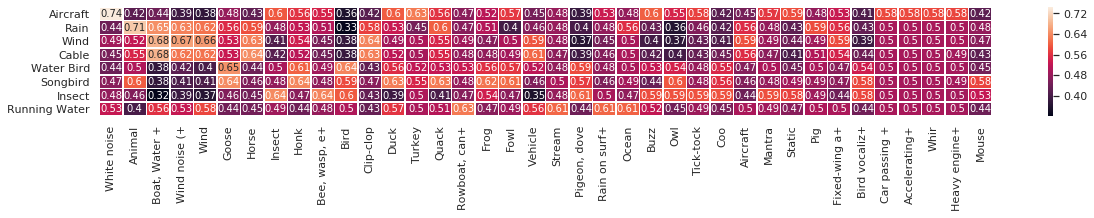

In [197]:

# plt.figure(figsize=(15, 2))

fig, ax = plt.subplots(figsize=(20,2))         # Sample figsize in inches

tag_label_max = sns.heatmap(fg_df,xticklabels=fg_df.columns,yticklabels=fg_df.index,annot=True,linewidths=.5)
ax.set_ylim(len(fg_df), 0)


In [198]:
fig=tag_label_max.get_figure()
fig.savefig("test_filter0.58_rotated_short.svg",bbox_inches="tight", format='svg')